<a href="https://colab.research.google.com/github/pravash21/Neural-Style-Transfer/blob/master/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models , transforms
from torch import optim
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
vgg = models.vgg19(pretrained = True).features

for param in vgg.parameters():
    param.requires_grad_(False)

In [7]:
vgg

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [0]:
def load_image(path , max_size=400 , shape = None):
    image = Image.open(path).convert('RGB')
    if(max(image.size)) > max_size:
        size = max_size
    else:
        size = max(image.size)
    if shape is not None :
        size = shape
    transform_test = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
    return transform_test(image)[:3,:,:].unsqueeze(0)

In [10]:
from google.colab import files
uploaded = files.upload()

Saving IMG_20181106_193514.jpg to IMG_20181106_193514.jpg


In [0]:
content = load_image('IMG_20181106_193514.jpg')

In [26]:
from google.colab import files
uploaded = files.upload()

Saving style5.jpg to style5.jpg


In [0]:
stylized = load_image('style5.jpg' , shape=content.shape[-2:])

In [0]:
def im_convert(tensor):
    
    image = tensor.clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

In [29]:
vgg._modules.items()

odict_items([('0', Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('1', ReLU(inplace)), ('2', Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('3', ReLU(inplace)), ('4', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)), ('5', Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('6', ReLU(inplace)), ('7', Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('8', ReLU(inplace)), ('9', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)), ('10', Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('11', ReLU(inplace)), ('12', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('13', ReLU(inplace)), ('14', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('15', ReLU(inplace)), ('16', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('17', ReLU(inplace)), ('18', MaxPool2d(kernel_size=2, str

In [0]:
def get_featured_images(image):
    layers = {'0': 'conv1_1', 
                 '5' : 'conv2_1',
                 '10' : 'conv3_1',
                 '19' : 'conv4_1',
                  '21' : 'conv5_1',
                  '28' : 'conv6_1'
                 }
    feature = {}
    x = image
    for no , layer in vgg._modules.items():
        x = layer(x)
        if no in layers:
            feature[layers[no]] = x
    return feature

In [0]:
def gram_matrix(tensor):
    _ , d , h , w = tensor.size()
    new_tensor = tensor.view(d , h*w)
    return torch.mm(new_tensor , new_tensor.t())

In [0]:
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

content_weight = 1  
style_weight = 1e6 
target = content.clone().requires_grad_(True)

epoch 1 628223744.0
epoch 2 622046016.0
epoch 3 617501440.0
epoch 4 613865408.0
epoch 5 610680960.0
epoch 6 607790848.0
epoch 7 605127616.0
epoch 8 602647552.0
epoch 9 600325632.0
epoch 10 598140736.0


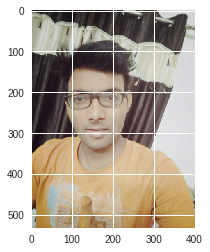

epoch 11 596072576.0
epoch 12 594105280.0
epoch 13 592227136.0
epoch 14 590425728.0
epoch 15 588688384.0
epoch 16 587003264.0
epoch 17 585362368.0
epoch 18 583758784.0
epoch 19 582187968.0
epoch 20 580646912.0


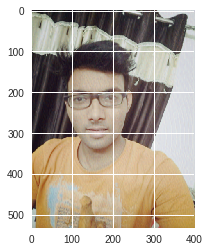

epoch 21 579133888.0
epoch 22 577648576.0
epoch 23 576187584.0
epoch 24 574748480.0
epoch 25 573327360.0
epoch 26 571919488.0
epoch 27 570520512.0
epoch 28 569125248.0
epoch 29 567730368.0
epoch 30 566332224.0


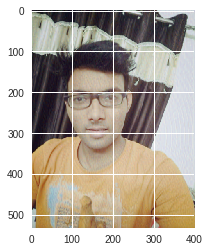

epoch 31 564928704.0
epoch 32 563516928.0
epoch 33 562095872.0
epoch 34 560665024.0
epoch 35 559222336.0
epoch 36 557767424.0
epoch 37 556299264.0
epoch 38 554816768.0
epoch 39 553319872.0
epoch 40 551807808.0


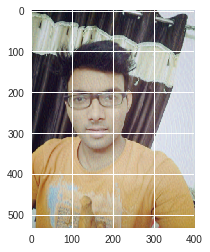

epoch 41 550279360.0
epoch 42 548734016.0
epoch 43 547171456.0
epoch 44 545590464.0
epoch 45 543990464.0
epoch 46 542371008.0
epoch 47 540731776.0
epoch 48 539072064.0
epoch 49 537390784.0
epoch 50 535687808.0


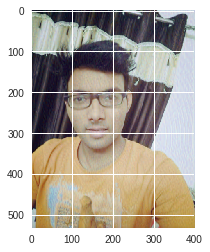

epoch 51 533962784.0
epoch 52 532214912.0
epoch 53 530443776.0
epoch 54 528648928.0
epoch 55 526829600.0
epoch 56 524985824.0
epoch 57 523117504.0
epoch 58 521224320.0
epoch 59 519305600.0
epoch 60 517361632.0


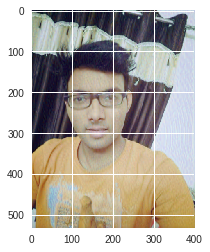

epoch 61 515391360.0
epoch 62 513395072.0
epoch 63 511372416.0
epoch 64 509322880.0
epoch 65 507246080.0
epoch 66 505142432.0
epoch 67 503011520.0
epoch 68 500853472.0
epoch 69 498667744.0
epoch 70 496454208.0


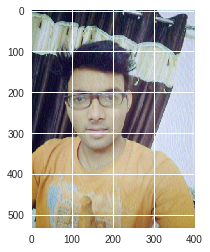

epoch 71 494212512.0
epoch 72 491942912.0
epoch 73 489645024.0
epoch 74 487318848.0
epoch 75 484964064.0
epoch 76 482580672.0
epoch 77 480169056.0
epoch 78 477728896.0
epoch 79 475259936.0
epoch 80 472762112.0


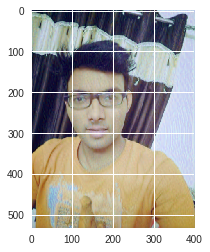

epoch 81 470235392.0
epoch 82 467679552.0
epoch 83 465094720.0
epoch 84 462480672.0
epoch 85 459836544.0
epoch 86 457161792.0
epoch 87 454456192.0
epoch 88 451719136.0
epoch 89 448950176.0
epoch 90 446148544.0


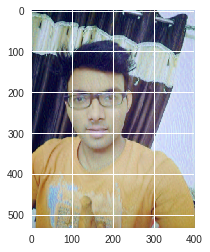

epoch 91 443313856.0
epoch 92 440445440.0
epoch 93 437542784.0
epoch 94 434605856.0
epoch 95 431633952.0
epoch 96 428626976.0
epoch 97 425584768.0
epoch 98 422507616.0
epoch 99 419395616.0
epoch 100 416248576.0


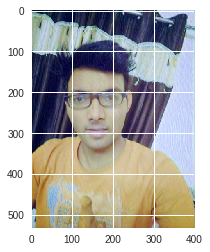

epoch 101 413067232.0
epoch 102 409852320.0
epoch 103 406604160.0
epoch 104 403323328.0
epoch 105 400010880.0
epoch 106 396667392.0
epoch 107 393293856.0
epoch 108 389890528.0
epoch 109 386458752.0
epoch 110 382999424.0


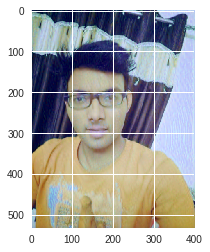

epoch 111 379513504.0
epoch 112 376002080.0
epoch 113 372466400.0
epoch 114 368907360.0
epoch 115 365325664.0
epoch 116 361722720.0
epoch 117 358099328.0
epoch 118 354456608.0
epoch 119 350796000.0
epoch 120 347118624.0


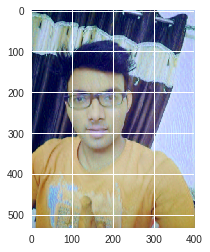

epoch 121 343425920.0
epoch 122 339718656.0
epoch 123 335997760.0
epoch 124 332264736.0
epoch 125 328520512.0
epoch 126 324766464.0
epoch 127 321003232.0
epoch 128 317232192.0
epoch 129 313454080.0
epoch 130 309670304.0


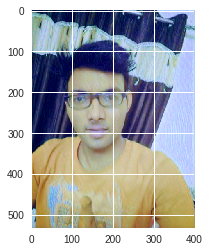

epoch 131 305882304.0
epoch 132 302090784.0
epoch 133 298296640.0
epoch 134 294500992.0
epoch 135 290704800.0
epoch 136 286909344.0
epoch 137 283115424.0
epoch 138 279324288.0
epoch 139 275536896.0
epoch 140 271754624.0


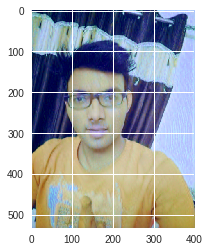

epoch 141 267978336.0
epoch 142 264209296.0
epoch 143 260448432.0
epoch 144 256697360.0
epoch 145 252957168.0
epoch 146 249228752.0
epoch 147 245513200.0
epoch 148 241811520.0
epoch 149 238124592.0
epoch 150 234453648.0


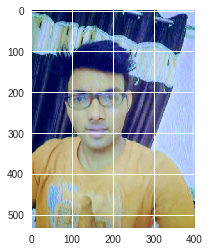

epoch 151 230799840.0
epoch 152 227164048.0
epoch 153 223547264.0
epoch 154 219950800.0
epoch 155 216375344.0
epoch 156 212822064.0
epoch 157 209291824.0
epoch 158 205785744.0
epoch 159 202304368.0
epoch 160 198848496.0


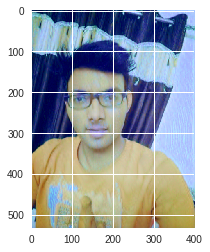

epoch 161 195418528.0
epoch 162 192015408.0
epoch 163 188640080.0
epoch 164 185292896.0
epoch 165 181974384.0
epoch 166 178685152.0
epoch 167 175425824.0
epoch 168 172196848.0
epoch 169 168998784.0
epoch 170 165831920.0


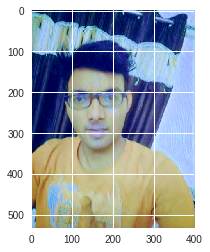

epoch 171 162696800.0
epoch 172 159593632.0
epoch 173 156523168.0
epoch 174 153485440.0
epoch 175 150480928.0
epoch 176 147509904.0
epoch 177 144572688.0
epoch 178 141669600.0
epoch 179 138800720.0
epoch 180 135966528.0


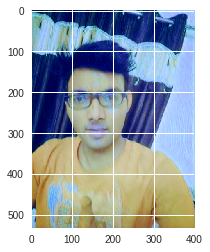

epoch 181 133167088.0
epoch 182 130402592.0
epoch 183 127673512.0
epoch 184 124979816.0
epoch 185 122321792.0
epoch 186 119699416.0
epoch 187 117112952.0
epoch 188 114562536.0
epoch 189 112048544.0
epoch 190 109570848.0


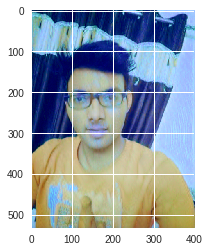

epoch 191 107129664.0
epoch 192 104724976.0
epoch 193 102357000.0
epoch 194 100025752.0
epoch 195 97731480.0
epoch 196 95474200.0
epoch 197 93253944.0
epoch 198 91070752.0
epoch 199 88924640.0
epoch 200 86815848.0


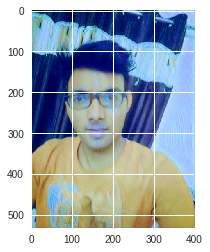

In [33]:
optimizer = optim.Adam([target] , lr = 0.005)
original_features = get_featured_images(content)
style_features = get_featured_images(stylized)
style_grams = {layer : gram_matrix(style_features[layer]) for layer in style_features}


for epoch in range(1 , 201):
    changed_features = get_featured_images(target)
    content_loss = torch.mean((original_features['conv5_1'] - changed_features['conv5_1'])**2)
    style_loss = 0
    
    for layer in style_weights:
        gram_target = gram_matrix(changed_features[layer])
        _ , d , h , w = changed_features[layer].shape
        gram_style = style_grams[layer]
        style_loss += (style_weights[layer]*torch.mean((gram_target - gram_style)**2))/(d*h*w)
        
    total_loss = content_weight*content_loss + style_weight*style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    print('epoch' , epoch , total_loss.item())
    
    if epoch%10 == 0:
        plt.imshow(im_convert(target))
        plt.show()